# Iris Flowers Classification

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:
- Id

- SepalLengthCm

- SepalWidthCm

- PetalLengthCm

- PetalWidthCm

- Species

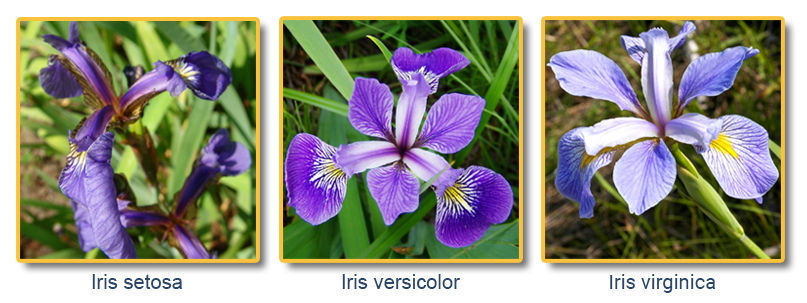



Importing necessary libraries


In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings(action='ignore')

Reading data from the `iris` dataset


In [96]:
iris = pd.read_csv("iris.csv")
print(iris)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [97]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [98]:
print(iris.shape)

(150, 6)


In [99]:
print(iris.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


Checking for null values in the dataset

In [100]:
print(iris.isna().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [101]:
print(iris.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [102]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [103]:
iris.head(150)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [104]:
iris.tail(100)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [105]:
n = len(iris[iris['Species'] == 'versicolor'])
print("No of Versicolor in Dataset:",n)

No of Versicolor in Dataset: 0


In [106]:
n1 = len(iris[iris['Species'] == 'virginica'])
print("No of Virginica in Dataset:",n1)

No of Virginica in Dataset: 0


In [107]:
n2 = len(iris[iris['Species'] == 'setosa'])
print("No of Setosa in Dataset:",n2)

No of Setosa in Dataset: 0


# Data Visualization

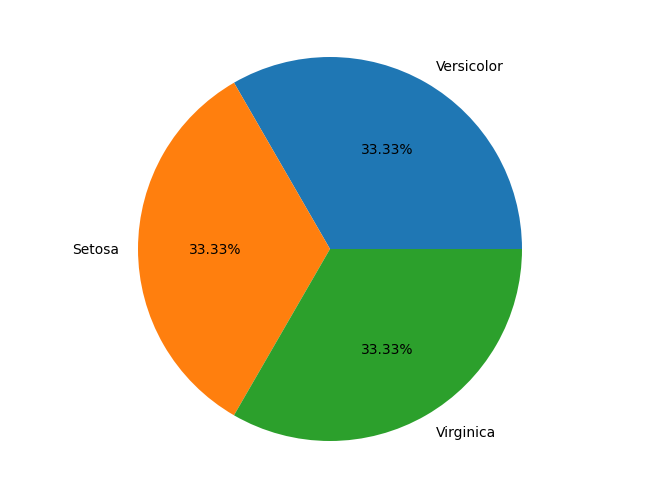

In [108]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

Checking for outliers in the dataset

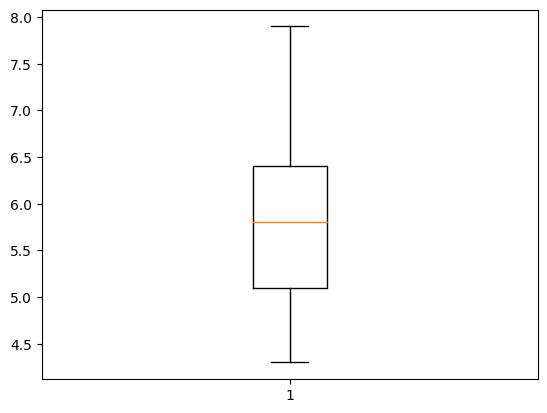

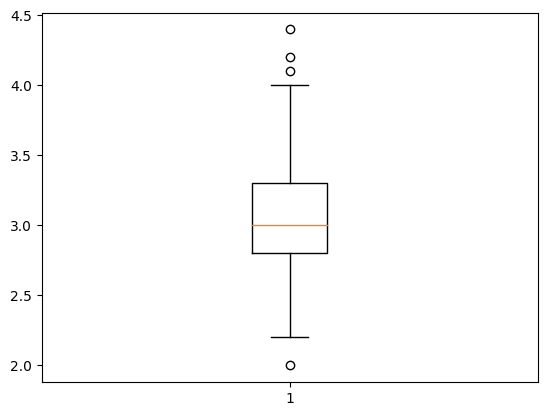

In [109]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.boxplot([iris['SepalLengthCm']])
plt.figure(2)
plt.boxplot([iris['SepalWidthCm']])
plt.show()

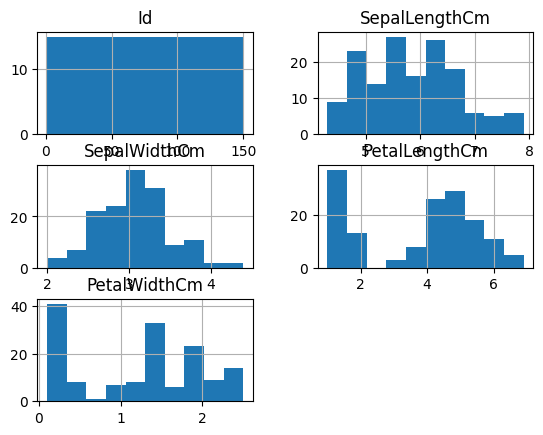

In [110]:
iris.hist()
plt.show()

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

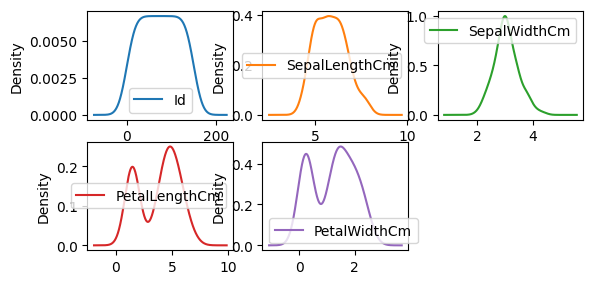

In [111]:
iris.plot(kind ='density',subplots = True, layout =(3,3),sharex = False)

Id                  AxesSubplot(0.125,0.53;0.133621x0.35)
SepalLengthCm    AxesSubplot(0.285345,0.53;0.133621x0.35)
SepalWidthCm      AxesSubplot(0.44569,0.53;0.133621x0.35)
PetalLengthCm    AxesSubplot(0.606034,0.53;0.133621x0.35)
PetalWidthCm     AxesSubplot(0.766379,0.53;0.133621x0.35)
dtype: object

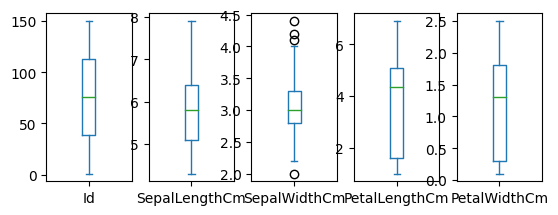

In [112]:
iris.plot(kind ='box',subplots = True, layout =(2,5),sharex = False)

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

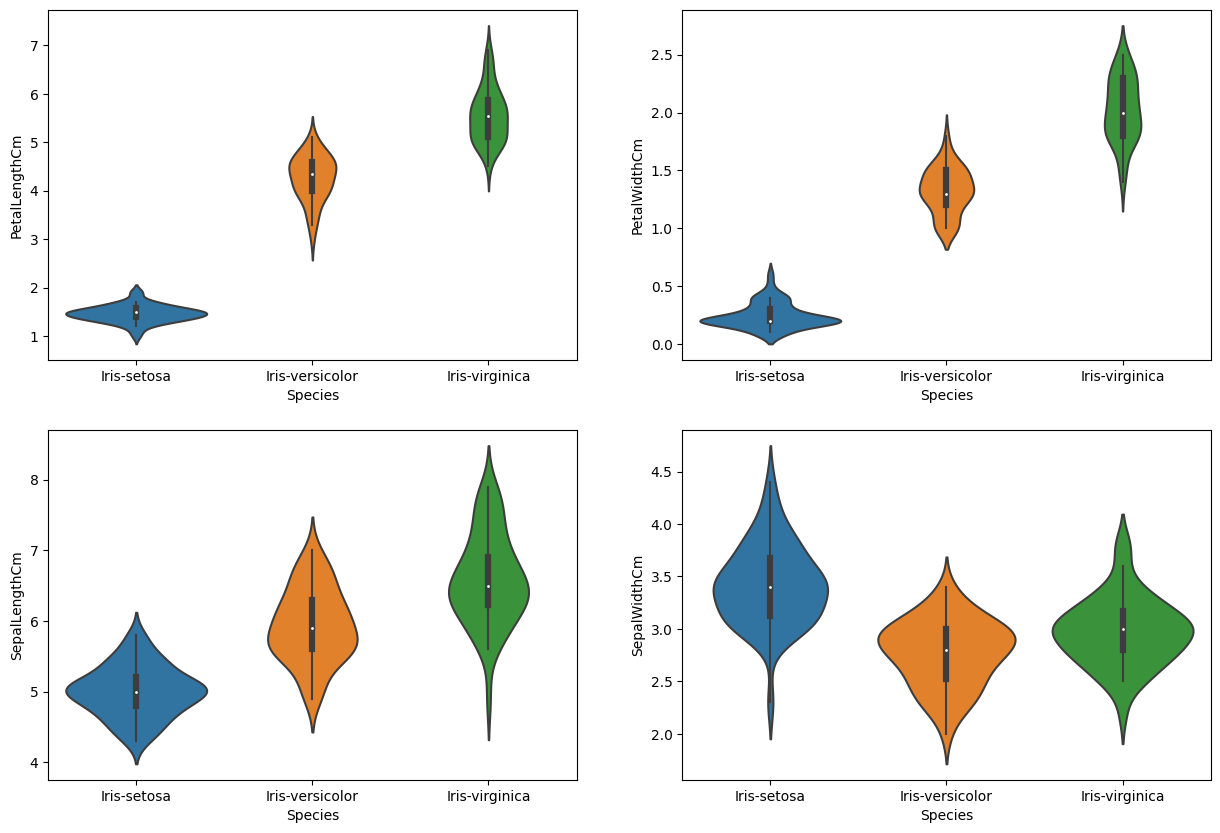

In [113]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

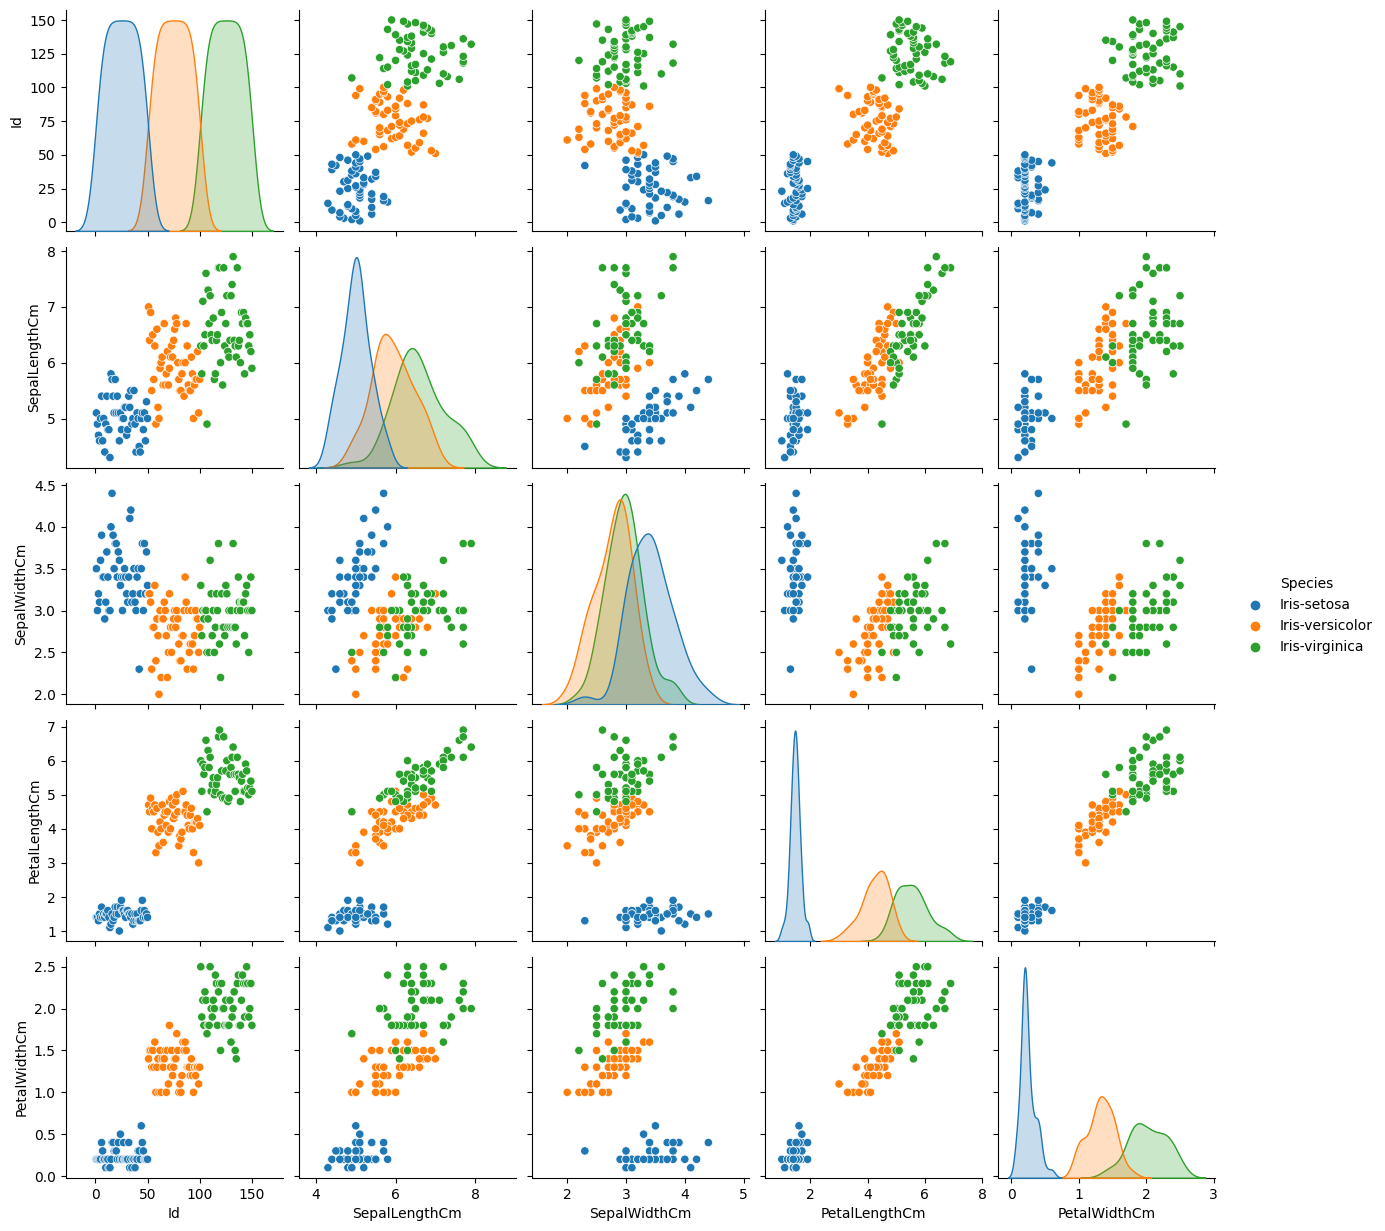

In [114]:
sns.pairplot(iris,hue='Species');

# Correlations

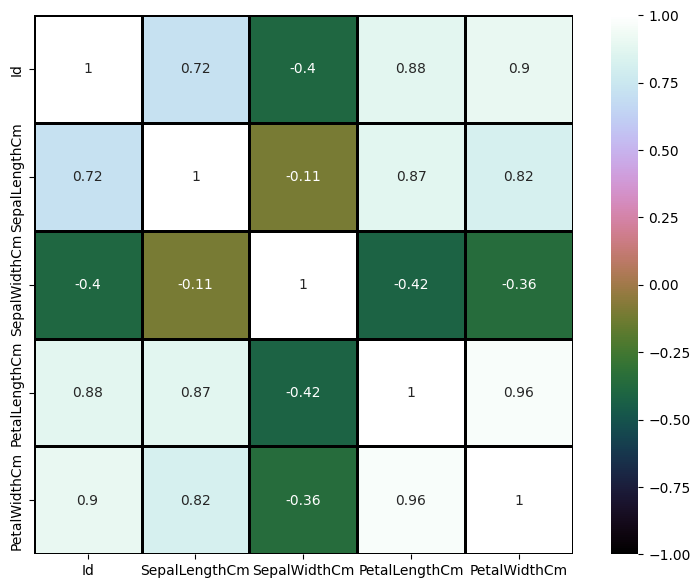

In [115]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(iris.corr(),annot=True,cmap='cubehelix',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

In [118]:
X = iris['SepalLengthCm'].values.reshape(-1,1)
print(X)

[[5.1]
 [4.9]
 [4.7]
 [4.6]
 [5. ]
 [5.4]
 [4.6]
 [5. ]
 [4.4]
 [4.9]
 [5.4]
 [4.8]
 [4.8]
 [4.3]
 [5.8]
 [5.7]
 [5.4]
 [5.1]
 [5.7]
 [5.1]
 [5.4]
 [5.1]
 [4.6]
 [5.1]
 [4.8]
 [5. ]
 [5. ]
 [5.2]
 [5.2]
 [4.7]
 [4.8]
 [5.4]
 [5.2]
 [5.5]
 [4.9]
 [5. ]
 [5.5]
 [4.9]
 [4.4]
 [5.1]
 [5. ]
 [4.5]
 [4.4]
 [5. ]
 [5.1]
 [4.8]
 [5.1]
 [4.6]
 [5.3]
 [5. ]
 [7. ]
 [6.4]
 [6.9]
 [5.5]
 [6.5]
 [5.7]
 [6.3]
 [4.9]
 [6.6]
 [5.2]
 [5. ]
 [5.9]
 [6. ]
 [6.1]
 [5.6]
 [6.7]
 [5.6]
 [5.8]
 [6.2]
 [5.6]
 [5.9]
 [6.1]
 [6.3]
 [6.1]
 [6.4]
 [6.6]
 [6.8]
 [6.7]
 [6. ]
 [5.7]
 [5.5]
 [5.5]
 [5.8]
 [6. ]
 [5.4]
 [6. ]
 [6.7]
 [6.3]
 [5.6]
 [5.5]
 [5.5]
 [6.1]
 [5.8]
 [5. ]
 [5.6]
 [5.7]
 [5.7]
 [6.2]
 [5.1]
 [5.7]
 [6.3]
 [5.8]
 [7.1]
 [6.3]
 [6.5]
 [7.6]
 [4.9]
 [7.3]
 [6.7]
 [7.2]
 [6.5]
 [6.4]
 [6.8]
 [5.7]
 [5.8]
 [6.4]
 [6.5]
 [7.7]
 [7.7]
 [6. ]
 [6.9]
 [5.6]
 [7.7]
 [6.3]
 [6.7]
 [7.2]
 [6.2]
 [6.1]
 [6.4]
 [7.2]
 [7.4]
 [7.9]
 [6.4]
 [6.3]
 [6.1]
 [7.7]
 [6.3]
 [6.4]
 [6. ]
 [6.9]
 [6.7]
 [6.9]
 [5.8]

In [120]:
Y = iris['SepalWidthCm'].values.reshape(-1,1)
print(Y)

[[3.5]
 [3. ]
 [3.2]
 [3.1]
 [3.6]
 [3.9]
 [3.4]
 [3.4]
 [2.9]
 [3.1]
 [3.7]
 [3.4]
 [3. ]
 [3. ]
 [4. ]
 [4.4]
 [3.9]
 [3.5]
 [3.8]
 [3.8]
 [3.4]
 [3.7]
 [3.6]
 [3.3]
 [3.4]
 [3. ]
 [3.4]
 [3.5]
 [3.4]
 [3.2]
 [3.1]
 [3.4]
 [4.1]
 [4.2]
 [3.1]
 [3.2]
 [3.5]
 [3.1]
 [3. ]
 [3.4]
 [3.5]
 [2.3]
 [3.2]
 [3.5]
 [3.8]
 [3. ]
 [3.8]
 [3.2]
 [3.7]
 [3.3]
 [3.2]
 [3.2]
 [3.1]
 [2.3]
 [2.8]
 [2.8]
 [3.3]
 [2.4]
 [2.9]
 [2.7]
 [2. ]
 [3. ]
 [2.2]
 [2.9]
 [2.9]
 [3.1]
 [3. ]
 [2.7]
 [2.2]
 [2.5]
 [3.2]
 [2.8]
 [2.5]
 [2.8]
 [2.9]
 [3. ]
 [2.8]
 [3. ]
 [2.9]
 [2.6]
 [2.4]
 [2.4]
 [2.7]
 [2.7]
 [3. ]
 [3.4]
 [3.1]
 [2.3]
 [3. ]
 [2.5]
 [2.6]
 [3. ]
 [2.6]
 [2.3]
 [2.7]
 [3. ]
 [2.9]
 [2.9]
 [2.5]
 [2.8]
 [3.3]
 [2.7]
 [3. ]
 [2.9]
 [3. ]
 [3. ]
 [2.5]
 [2.9]
 [2.5]
 [3.6]
 [3.2]
 [2.7]
 [3. ]
 [2.5]
 [2.8]
 [3.2]
 [3. ]
 [3.8]
 [2.6]
 [2.2]
 [3.2]
 [2.8]
 [2.8]
 [2.7]
 [3.3]
 [3.2]
 [2.8]
 [3. ]
 [2.8]
 [3. ]
 [2.8]
 [3.8]
 [2.8]
 [2.8]
 [2.6]
 [3. ]
 [3.4]
 [3.1]
 [3. ]
 [3.1]
 [3.1]
 [3.1]
 [2.7]

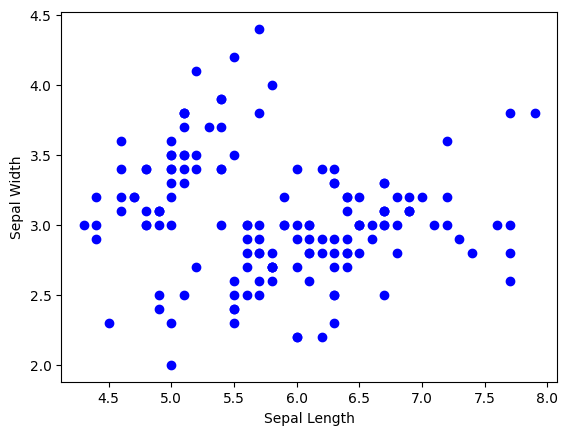

In [121]:
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(X,Y,color='b')
plt.show()

In [122]:
corr_mat = iris.corr()
print(corr_mat)

                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


# Model Buidling

In [123]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# Train and Test Split

In [124]:
train, test = train_test_split(iris, test_size = 0.25)
print(train.shape)
print(test.shape)

(112, 6)
(38, 6)


In [126]:
train_X = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
                 'PetalWidthCm']]
train_y = train.Species

test_X = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
                 'PetalWidthCm']]
test_y = test.Species

In [127]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
103,6.3,2.9,5.6,1.8
29,4.7,3.2,1.6,0.2
58,6.6,2.9,4.6,1.3
109,7.2,3.6,6.1,2.5
83,6.0,2.7,5.1,1.6


In [128]:
test_y.head()

63     Iris-versicolor
124     Iris-virginica
87     Iris-versicolor
86     Iris-versicolor
149     Iris-virginica
Name: Species, dtype: object

In [129]:
test_y.head()

63     Iris-versicolor
124     Iris-virginica
87     Iris-versicolor
86     Iris-versicolor
149     Iris-virginica
Name: Species, dtype: object

# Logistic Regression

In [130]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('Logistic Regression Accuracy:',metrics.accuracy_score(prediction,test_y))

Logistic Regression Accuracy: 0.9736842105263158


### Confusion Matrix

In [131]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_mat = confusion_matrix(test_y,prediction)
print("Confusion matrix: \n",confusion_mat)
print(classification_report(test_y,prediction))

Confusion matrix: 
 [[11  0  0]
 [ 0 11  0]
 [ 0  1 15]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.94      0.97        16

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



# Support Vector Machine (SVM)

In [132]:
from sklearn.svm import SVC
model1 = SVC()
model1.fit(train_X,train_y)

pred_y = model1.predict(test_X)

from sklearn.metrics import accuracy_score
print("Support Vector Accuracy =",accuracy_score(test_y,pred_y))

Support Vector Accuracy = 0.9473684210526315


# K-Nearest Neighbours

In [133]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(train_X,train_y)
y_pred2 = model2.predict(test_X)

from sklearn.metrics import accuracy_score
print("KNN Accuracy Score = ",accuracy_score(test_y,y_pred2))

KNN Accuracy Score =  0.9736842105263158


# Gaussian DB

In [134]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(train_X,train_y)
y_pred3 = model3.predict(test_X)

from sklearn.metrics import accuracy_score
print("Gaussian DB Accuracy Score = ",accuracy_score(test_y,y_pred3))

Gaussian DB Accuracy Score =  0.9736842105263158


# Decision Tree

In [136]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(train_X,train_y)
y_pred4 = model4.predict(test_X)

from sklearn.metrics import accuracy_score
print("Decision Tree Accuracy Score = ",accuracy_score(test_y,y_pred4))

Decision Tree Accuracy Score =  0.9210526315789473


### Combining Results

In [137]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'Naive Bayes','KNN' ,'Decision Tree'] ,'Score': [0.947,0.947,0.947,0.947,0.921]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
0.947,Logistic Regression
0.947,Support Vector Machines
0.947,Naive Bayes
0.947,KNN
0.921,Decision Tree


Thus, we can conclude that we can use KNN, LoR, SVM, Naive Bayes for IRIS Flower Classification.